# Tarea 5 - Introducción a la Biomecánica

In [1]:
import scipy.integrate as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [2]:
# Graphs
naranjo = '#F59A23'     
azul = '#010589'
rojo = '#E40C2B'
verde = '#00D300'
grosor = 2.5
fig_size = (12, 6)
fig_size_2 = (8, 5)

### Pregunta 1

In [3]:
# Arrays
disp = (
    0,
    0.36,	        
    0.522481522481,	
    0.678044678044,	
    0.826985826985,	
    0.969585969585,	
    1.10611,	        
    1.23683,	        
    1.36198,	        
    1.48181,	        
    1.59653,	        
    1.72322,	        
    1.8613,	        
    1.99938,	        
    2.13159,	        
    2.27491,	        
    2.41213,	        
    2.54935,	        
    2.69744,	        
    2.88211,	        
    3.09704,	        
    3.31198,	        
    3.55592,	        
    3.6
)

stress = (
    0,
    8.5815,
    13.7758,
    19.84,
    27.0188,
    35.6318,
    46.0235,
    58.5594,
    73.6726,
    91.7096,
    113.097,
    142.435,
    183.017,
    235.603,
    299.175,
    380.474,
    467.603,
    561.25,
    666.528,
    801.191,
    960.496,
    1121.19,
    1303.88,
    1336.85
)

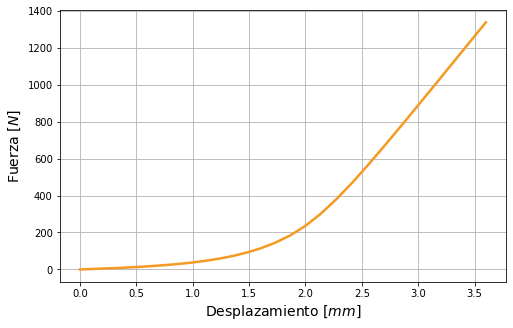

In [4]:
# Plot Fuerza vs. Desplazamiento
plt.figure(figsize=fig_size_2)
plt.plot(
    disp,
    stress,
    label='Datos experimentales',
    color=naranjo,
    linewidth=grosor
)
plt.xlabel(r'Desplazamiento $[mm]$', fontsize=14)
plt.ylabel(r'Fuerza $[N]$', fontsize=14)
plt.grid()
plt.show()

### Pregunta 2

#### Ítem I

In [5]:
# Parameters
global C_rs, R_aw, P_peep, P_peak, IT, RR
C_rs = 0.5
R_aw = 2
P_peep = 5
P_peak = 10
IT = 3
RR = 10 / 60

In [6]:
# Square wave
def p_mv(t):
    if t % (1 / RR) < IT:
        return P_peak
    return P_peep

In [7]:
# Derivada control
def v_dot(v, t):
    return (p_mv(t) - P_peep - v / C_rs) / R_aw

In [8]:
# Volumen control
t = np.linspace(0, 5 / RR , 1000)
v_0 = 0
v_sol = sp.odeint(v_dot, v_0, t)

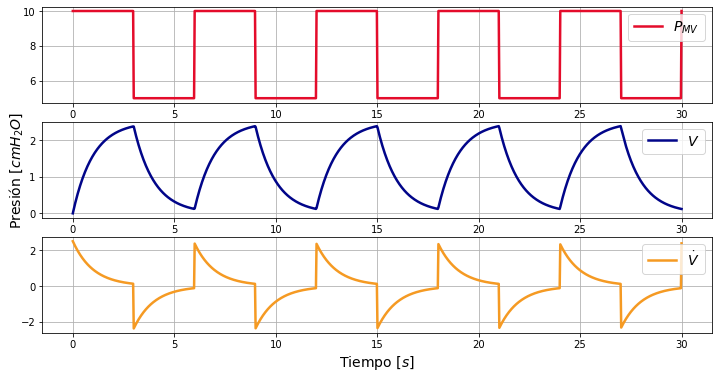

In [9]:
# Plot control
fig, ax = plt.subplots(3, 1, figsize=fig_size)
ax[0].plot(
    t, [p_mv(t[i]) for i in range(len(t))],
    label=r'$P_{MV}$',
    linewidth=grosor,
    color=rojo
)
ax[1].plot(
    t, v_sol,
    label=r'$V$',
    linewidth=grosor,
    color=azul
)
ax[2].plot(
    t, [v_dot(v_sol[i], t[i]) for i in range(len(t))],
    label=r'$\dot{V}$',
    linewidth=grosor,
    color=naranjo
)

ax[2].set_xlabel(r'Tiempo $[s]$', fontsize=14)
ax[1].set_ylabel(r'Presión $[cmH_2O]$', fontsize=14)

ax[0].legend(loc='upper right', fontsize=14)
ax[1].legend(loc='upper right', fontsize=14)
ax[2].legend(loc='upper right', fontsize=14)

ax[0].grid()
ax[1].grid()
ax[2].grid()

plt.show()

#### Ítem II

In [10]:
# Parameters
global C_rs_a, R_aw_a, P_peep_a, P_peak_a, IT_a, RR_a
global C_rs_c, R_aw_c, P_peep_c, P_peak_c, IT_c, RR_c

C_rs_a = 0.35
R_aw_a = 1.2
P_peep_a = 5
P_peak_a = 10
IT_a = 3
RR_a = 10 / 60

C_rs_c = 0.65
R_aw_c = 2.5
P_peep_c = 5
P_peak_c = 10
IT_c = 3
RR_c = 10 / 60

In [11]:
# Square wave
def p_mv_a(t):
    if t % (1 / RR_a) < IT_a:
        return P_peak_a
    return P_peep_a

def p_mv_c(t):
    if t % (1 / RR_c) < IT_c:
        return P_peak_c
    return P_peep_c

In [12]:
# Definición de derivadas ARDS y COPD
def v_dot_a(v, t):
    return (p_mv_a(t) - P_peep_a - v / C_rs_a) / R_aw_a

def v_dot_c(v, t):
    return (p_mv_c(t) - P_peep_c - v / C_rs_c) / R_aw_c

In [13]:
# Volumen ARDS y COPD
t_a = np.linspace(0, 5 / RR_a , 1000)
v_0_a = 0
v_sol_a = sp.odeint(v_dot_a, v_0_a, t_a)

t_c = np.linspace(0, 5 / RR_c , 1000)
v_0_c = 0
v_sol_c = sp.odeint(v_dot_c, v_0_c, t_c)

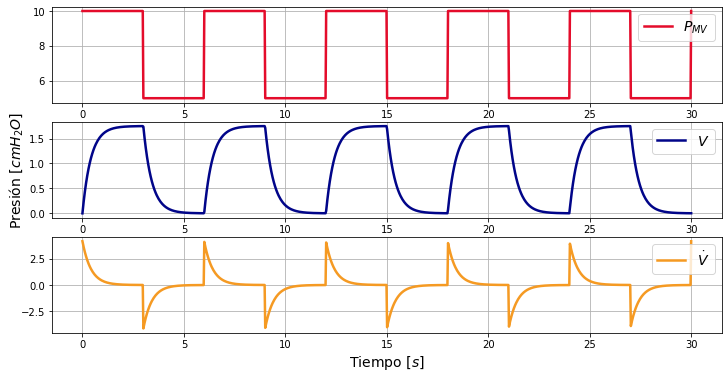

In [14]:
# Plot ARDS
fig, ax = plt.subplots(3, 1, figsize=fig_size)
ax[0].plot(
    t_a, [p_mv_a(t_a[i]) for i in range(len(t_a))],
    label=r'$P_{MV}$',
    linewidth=grosor,
    color=rojo
)
ax[1].plot(
    t_a, v_sol_a,
    label=r'$V$',
    linewidth=grosor,
    color=azul
)
ax[2].plot(
    t_a, [v_dot_a(v_sol_a[i], t_a[i]) for i in range(len(t_a))],
    label=r'$\dot{V}$',
    linewidth=grosor,
    color=naranjo
)

ax[2].set_xlabel(r'Tiempo $[s]$', fontsize=14)
ax[1].set_ylabel(r'Presión $[cmH_2O]$', fontsize=14)

ax[0].legend(loc='upper right', fontsize=14)
ax[1].legend(loc='upper right', fontsize=14)
ax[2].legend(loc='upper right', fontsize=14)

ax[0].grid()
ax[1].grid()
ax[2].grid()

plt.show()

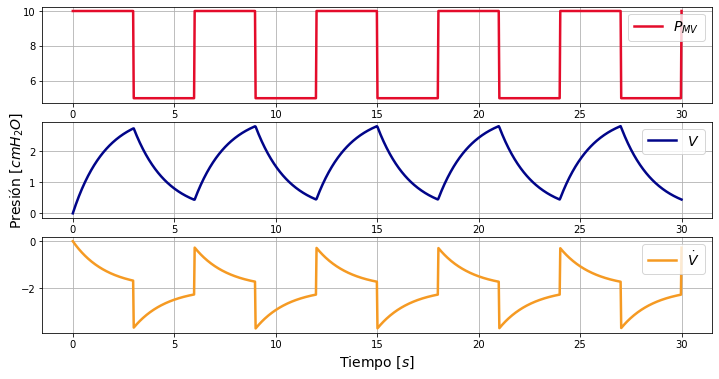

In [15]:
# Plot COPD
fig, ax = plt.subplots(3, 1, figsize=fig_size)
ax[0].plot(
    t_c, [p_mv_c(t_c[i]) for i in range(len(t_c))],
    label=r'$P_{MV}$',
    linewidth=grosor,
    color=rojo
)
ax[1].plot(
    t_c, v_sol_c,
    label=r'$V$',
    linewidth=grosor,
    color=azul
)
ax[2].plot(
    t_c, [v_dot_c(v_sol_c[i], t_c[i]) for i in range(len(t_c))] - \
        max([v_dot_c(v_sol_c[i], t_c[i]) for i in range(len(t_c))]),
    label=r'$\dot{V}$',
    linewidth=grosor,
    color=naranjo
)

ax[2].set_xlabel(r'Tiempo $[s]$', fontsize=14)
ax[1].set_ylabel(r'Presión $[cmH_2O]$', fontsize=14)

ax[0].legend(loc='upper right', fontsize=14)
ax[1].legend(loc='upper right', fontsize=14)
ax[2].legend(loc='upper right', fontsize=14)

ax[0].grid()
ax[1].grid()
ax[2].grid()

plt.show()

#### Ítem III

In [16]:
# Calculo de indicadores clínicos
# Volumen tidal
v_t = max(v_sol) - min(v_sol)
v_t_a = max(v_sol_a) - min(v_sol_a)
v_t_c = max(v_sol_c) - min(v_sol_c)

# Volumen minuto
v_m = v_t * 10
v_m_a = v_t_a * 10
v_m_c = v_t_c * 10

# Constante de tiempo
rc = R_aw * C_rs
rc_a = R_aw_a * C_rs_a
rc_c = R_aw_c * C_rs_c

print(v_t, v_t_a, v_t_c)
print(v_m, v_m_a, v_m_c)
print(rc, rc_a, rc_c)

[2.38107874] [1.74860782] [2.80612386]
[23.81078736] [17.48607818] [28.06123859]
1.0 0.42 1.625
